# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#set the style of all graphs to seaborn:
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn.cluster import KMeans

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [5]:
# Load the data
bank_data = pd.read_csv('bank-data.csv')

# Check the data
bank_data.columns
bank_data.drop('Unnamed: 0', axis=1,inplace=True)
#bank_data.head()
#bank_data

In [6]:
# Encode outcome column values as numbers
bank_data_mapped=bank_data.copy()
bank_data_mapped['y']=bank_data_mapped['y'].map({'yes':1,'no':0})
bank_data_mapped.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [7]:
#We are predicting if
# the client will subscribe a term deposit
# so y column is the y variable
# and 'duration' the x variable
y=bank_data_mapped['y']
x1=bank_data_mapped['duration']

### Simple Logistic Regression

Run the regression.

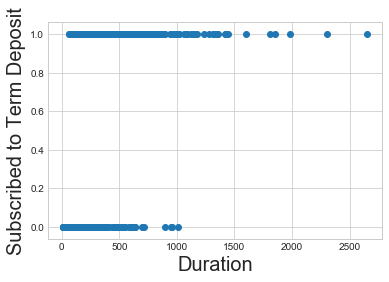

In [8]:
#create a scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Subscribed to Term Deposit',fontsize=20)
plt.show()

In [9]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
#x
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Aug 2019   Pseudo R-squ.:                  0.2121
Time:                        15:03:11   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [10]:
results_log.pred_table()

array([[204.,  55.],
       [104., 155.]])

### Interpretation

The shorter the duration of the time since the last contact was made with a given consumer, the more likely the client will subscribe to a term deposit.

---
### Extended Testing

#### 2 Clusters

In [22]:
from sklearn.cluster import KMeans

x3=bank_data_mapped.iloc[:,6:7]
x3

#we want to produce 2 clusters
kmeans=KMeans(2)
kmeans.fit(x3)

identified_clusters=kmeans.fit_predict(x3)
#identified_clusters

In [23]:
#create dataframe to see things clearly
data_with_clusters=bank_data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters.head()

,interest_rate,credit,march,may,previous,duration,y,Cluster
0,1.334,0.0,1.0,0.0,0.0,117.0,0,1
1,0.767,0.0,0.0,2.0,1.0,274.0,1,0
2,4.858,0.0,1.0,0.0,0.0,167.0,0,1
3,4.120,0.0,0.0,0.0,0.0,686.0,1,0
4,4.856,0.0,1.0,0.0,0.0,157.0,0,1


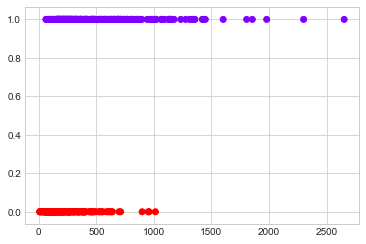

In [24]:
#the graph appears same as before. So use matplotlib to indicate the data points with different colors
#so we mention c=data_with_clusters['Cluster']--means we want to have as many colors for the points as there are clusters
plt.scatter(data_with_clusters['duration'],data_with_clusters['y'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()